<a href="https://colab.research.google.com/github/jonnells/cmpe255-project-grp/blob/main/Yelp_On_The_Go.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing File

## Import Libraries

In [1]:
import os
import json
import time

## Import Data from the Yelp Dataset
>Load in each line from the user.json and business.json file to start. <br> 
Data from the review.json file will be loaded in later

In [2]:
yelp_dataset_path = 'yelp_dataset/'

In [3]:
user_data = []
start = time.time()
with open(yelp_dataset_path + 'yelp_academic_dataset_user.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_user.json')
    for line in fin:
        user = json.loads(line)
        user_data.append(user)
end = time.time()
duration_without_dr = end-start
print("Time taken to load user data: %d seconds" %duration_without_dr)

Reading yelp_academic_dataset_user.json
Time taken to load user data: 23 seconds


In [4]:
business_data = []
start = time.time()
with open(yelp_dataset_path + 'yelp_academic_dataset_business.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_business.json')
    for line in fin:
        business = json.loads(line)
        business_data.append(business)

end = time.time()
duration_without_dr = end-start
print("Time taken to load business data: %d seconds" %duration_without_dr)

Reading yelp_academic_dataset_business.json
Time taken to load business data: 2 seconds


## Data Investigation
> Print the number of user and business records <br> Print the dictionary keys for each of the attributes

In [5]:
print(str(len(user_data)) + ' user records loaded')
print(str(len(business_data)) + ' business records loaded')

2189457 user records loaded
160585 business records loaded


In [6]:
print(user_data[0].keys())

dict_keys(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'])


In [7]:
print(business_data[0].keys())

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])


## Data Pre-processing
>Remove users that do not have enough reviews (15 reviews minimum)

In [8]:
user_data = [user for user in user_data if user.get('review_count') >= 15]

In [9]:
print(str(len(user_data)) + ' useful user records')

573316 useful user records


>Parse the business data and extract only the businesses that are restaurants

In [10]:
restaurant_category = 'Restaurants'
restaurant_data = []
for business in business_data:
    try:
        if restaurant_category in business.get('categories',):
            restaurant_data.append(business)
    except:
        pass

In [11]:
print(str(len(restaurant_data)) + ' restaurant records')

50763 restaurant records


>Parse the restaurant data and divide each restaurant by the state it operates in <br> 
Find the number of restaurants in each state <br>
Massachusetts is our chosen state to investigate since it has the most restaurants in the Yelp dataset

In [12]:
#ABE_restaurants = [restaurant for restaurant in restaurant_data if 'ABE' in restaurant.get('state')]
#BC_restaurants = [restaurant for restaurant in restaurant_data if 'BC' in restaurant.get('state')]
#CO_restaurants = [restaurant for restaurant in restaurant_data if 'CO' in restaurant.get('state')]
#FL_restaurants = [restaurant for restaurant in restaurant_data if 'FL' in restaurant.get('state')]
#GA_restaurants = [restaurant for restaurant in restaurant_data if 'GA' in restaurant.get('state')]
#KS_restaurants = [restaurant for restaurant in restaurant_data if 'KS' in restaurant.get('state')]
#KY_restaurants = [restaurant for restaurant in restaurant_data if 'KY' in restaurant.get('state')]
MA_restaurants = [restaurant for restaurant in restaurant_data if 'MA' in restaurant.get('state')]
#MN_restaurants = [restaurant for restaurant in restaurant_data if 'MN' in restaurant.get('state')]
#NH_restaurants = [restaurant for restaurant in restaurant_data if 'NH' in restaurant.get('state')]
#OH_restaurants = [restaurant for restaurant in restaurant_data if 'OH' in restaurant.get('state')]
#OR_restaurants = [restaurant for restaurant in restaurant_data if 'OR' in restaurant.get('state')]
#TX_restaurants = [restaurant for restaurant in restaurant_data if 'TX' in restaurant.get('state')]
#VA_restaurants = [restaurant for restaurant in restaurant_data if 'VA' in restaurant.get('state')]
#WA_restaurants = [restaurant for restaurant in restaurant_data if 'WA' in restaurant.get('state')]
#WY_restaurants = [restaurant for restaurant in restaurant_data if 'WY' in restaurant.get('state')]

#restaurant_len = [len(ABE_restaurants),len(BC_restaurants),len(CO_restaurants),len(FL_restaurants),len(GA_restaurants),len(KS_restaurants),len(KY_restaurants),len(MA_restaurants),len(MN_restaurants),len(NH_restaurants),len(OH_restaurants),len(OR_restaurants),len(TX_restaurants),len(VA_restaurants),len(WA_restaurants),len(WY_restaurants)]

In [13]:
states = [restaurant.get('state') for restaurant in restaurant_data]
tempset = set(states)
states = sorted(list(tempset))
restaurant_len = [1, 7506, 865, 7710, 6140, 1, 1, 10550, 1, 1, 4377, 7391, 5444, 1, 773, 1]
restaurants_by_state = {states[i]: restaurant_len[i] for i in range(len(states))}
print('Number of restaurants by state\n',restaurants_by_state)

Number of restaurants by state
 {'ABE': 1, 'BC': 7506, 'CO': 865, 'FL': 7710, 'GA': 6140, 'KS': 1, 'KY': 1, 'MA': 10550, 'MN': 1, 'NH': 1, 'OH': 4377, 'OR': 7391, 'TX': 5444, 'VA': 1, 'WA': 773, 'WY': 1}


> Filter out the businesses that have 40 or less reviews

In [14]:
MA_restaurants = [restaurant for restaurant in MA_restaurants if restaurant.get('review_count') >= 40]

>Create a new json file with just the restaurants in Massachusetts

In [15]:
with open('MA_restaurants.json', 'a') as outfile:
    json.dump(MA_restaurants, outfile, indent=1)

>Open the review.json file <br>
Extract the reviews of only the Massachusetts restaurants & only from users with 15 or more reviews

In [16]:
review_data = []
MA_restaurants_id = set([restaurant.get('business_id') for restaurant in MA_restaurants])
valid_user_id = set([user.get('user_id') for user in user_data])
start = time.time()
with open(yelp_dataset_path + 'yelp_academic_dataset_review.json', encoding="utf8") as fin:
    print('Reading yelp_academic_dataset_review.json')
    for line in fin:
        review = json.loads(line)
        if review.get('business_id') in MA_restaurants_id:
            if review.get('user_id') in valid_user_id:
                review_data.append(review)

end = time.time()
duration_without_dr = end-start
print("Time taken to load review data: %d seconds" %duration_without_dr)

Reading yelp_academic_dataset_review.json
Time taken to load review data: 53 seconds


> Only include reviews from users that has reviewed 15 or more of the selected restaurants in Massachusetts <br>
Only include reviews from businesses that has gotten 40 or more reviews in the review set

In [17]:
from collections import Counter
filter_user = set()
filter_restaurant = set()
user_review_count_MA = Counter(k['user_id'] for k in review_data if k.get('user_id'))
restaurant_review_count_MA = Counter(k['business_id'] for k in review_data if k.get('business_id'))
for user, count in user_review_count_MA.most_common():
    if count >= 15:
        filter_user.add(user)
for biz, count in restaurant_review_count_MA.most_common():
    if count >= 40:
        filter_restaurant.add(biz)

review_data[:] = [x for x in review_data if x.get('user_id') in filter_user and x.get('business_id') in filter_restaurant]

>Plot the Review Rating Distribution

5.0    126504
4.0    170868
3.0     94344
2.0     47490
1.0     26070
Name: stars, dtype: int64


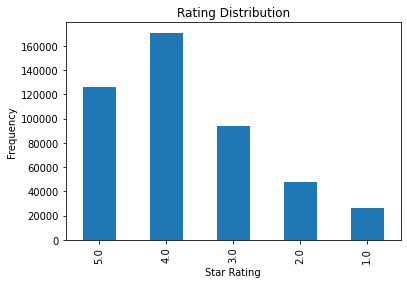

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(review_data)
print(df['stars'].value_counts().sort_index(ascending=False))
df.stars.value_counts().sort_index(ascending=False).plot(kind="bar",title='Rating Distribution',xlabel='Star Rating',ylabel="Frequency");

>Print the dictionary keys for each of the review attributes

In [19]:
print(review_data[0].keys())

dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])


>Create a new json file with just the reviews of restaurants in Massachusetts

In [20]:
with open('MA_reviews.json', 'a') as outfile:
    json.dump(review_data, outfile, indent=1)

> Parse the Massachusetts restaurant reviews and get the unqiue user_ids <br>
Parse the users with 15 of more reviews and extract the user_ids of users who made a Massachusetts restaurant review

In [21]:
MA_users = []
MA_user_id = set([review.get('user_id') for review in review_data])
for user in user_data:
    if user.get('user_id') in MA_user_id:
        MA_users.append(user)



>Create a new json file with just the users who made 15 or more reviews of restaurants in Massachusetts

In [22]:
with open('MA_users.json', 'a') as outfile:
    json.dump(MA_users, outfile, indent=1)
